Radionuclide:  Sr-88
Half life:  Stable
Progeny:  []
Decay modes: []
Branching ratios:  []


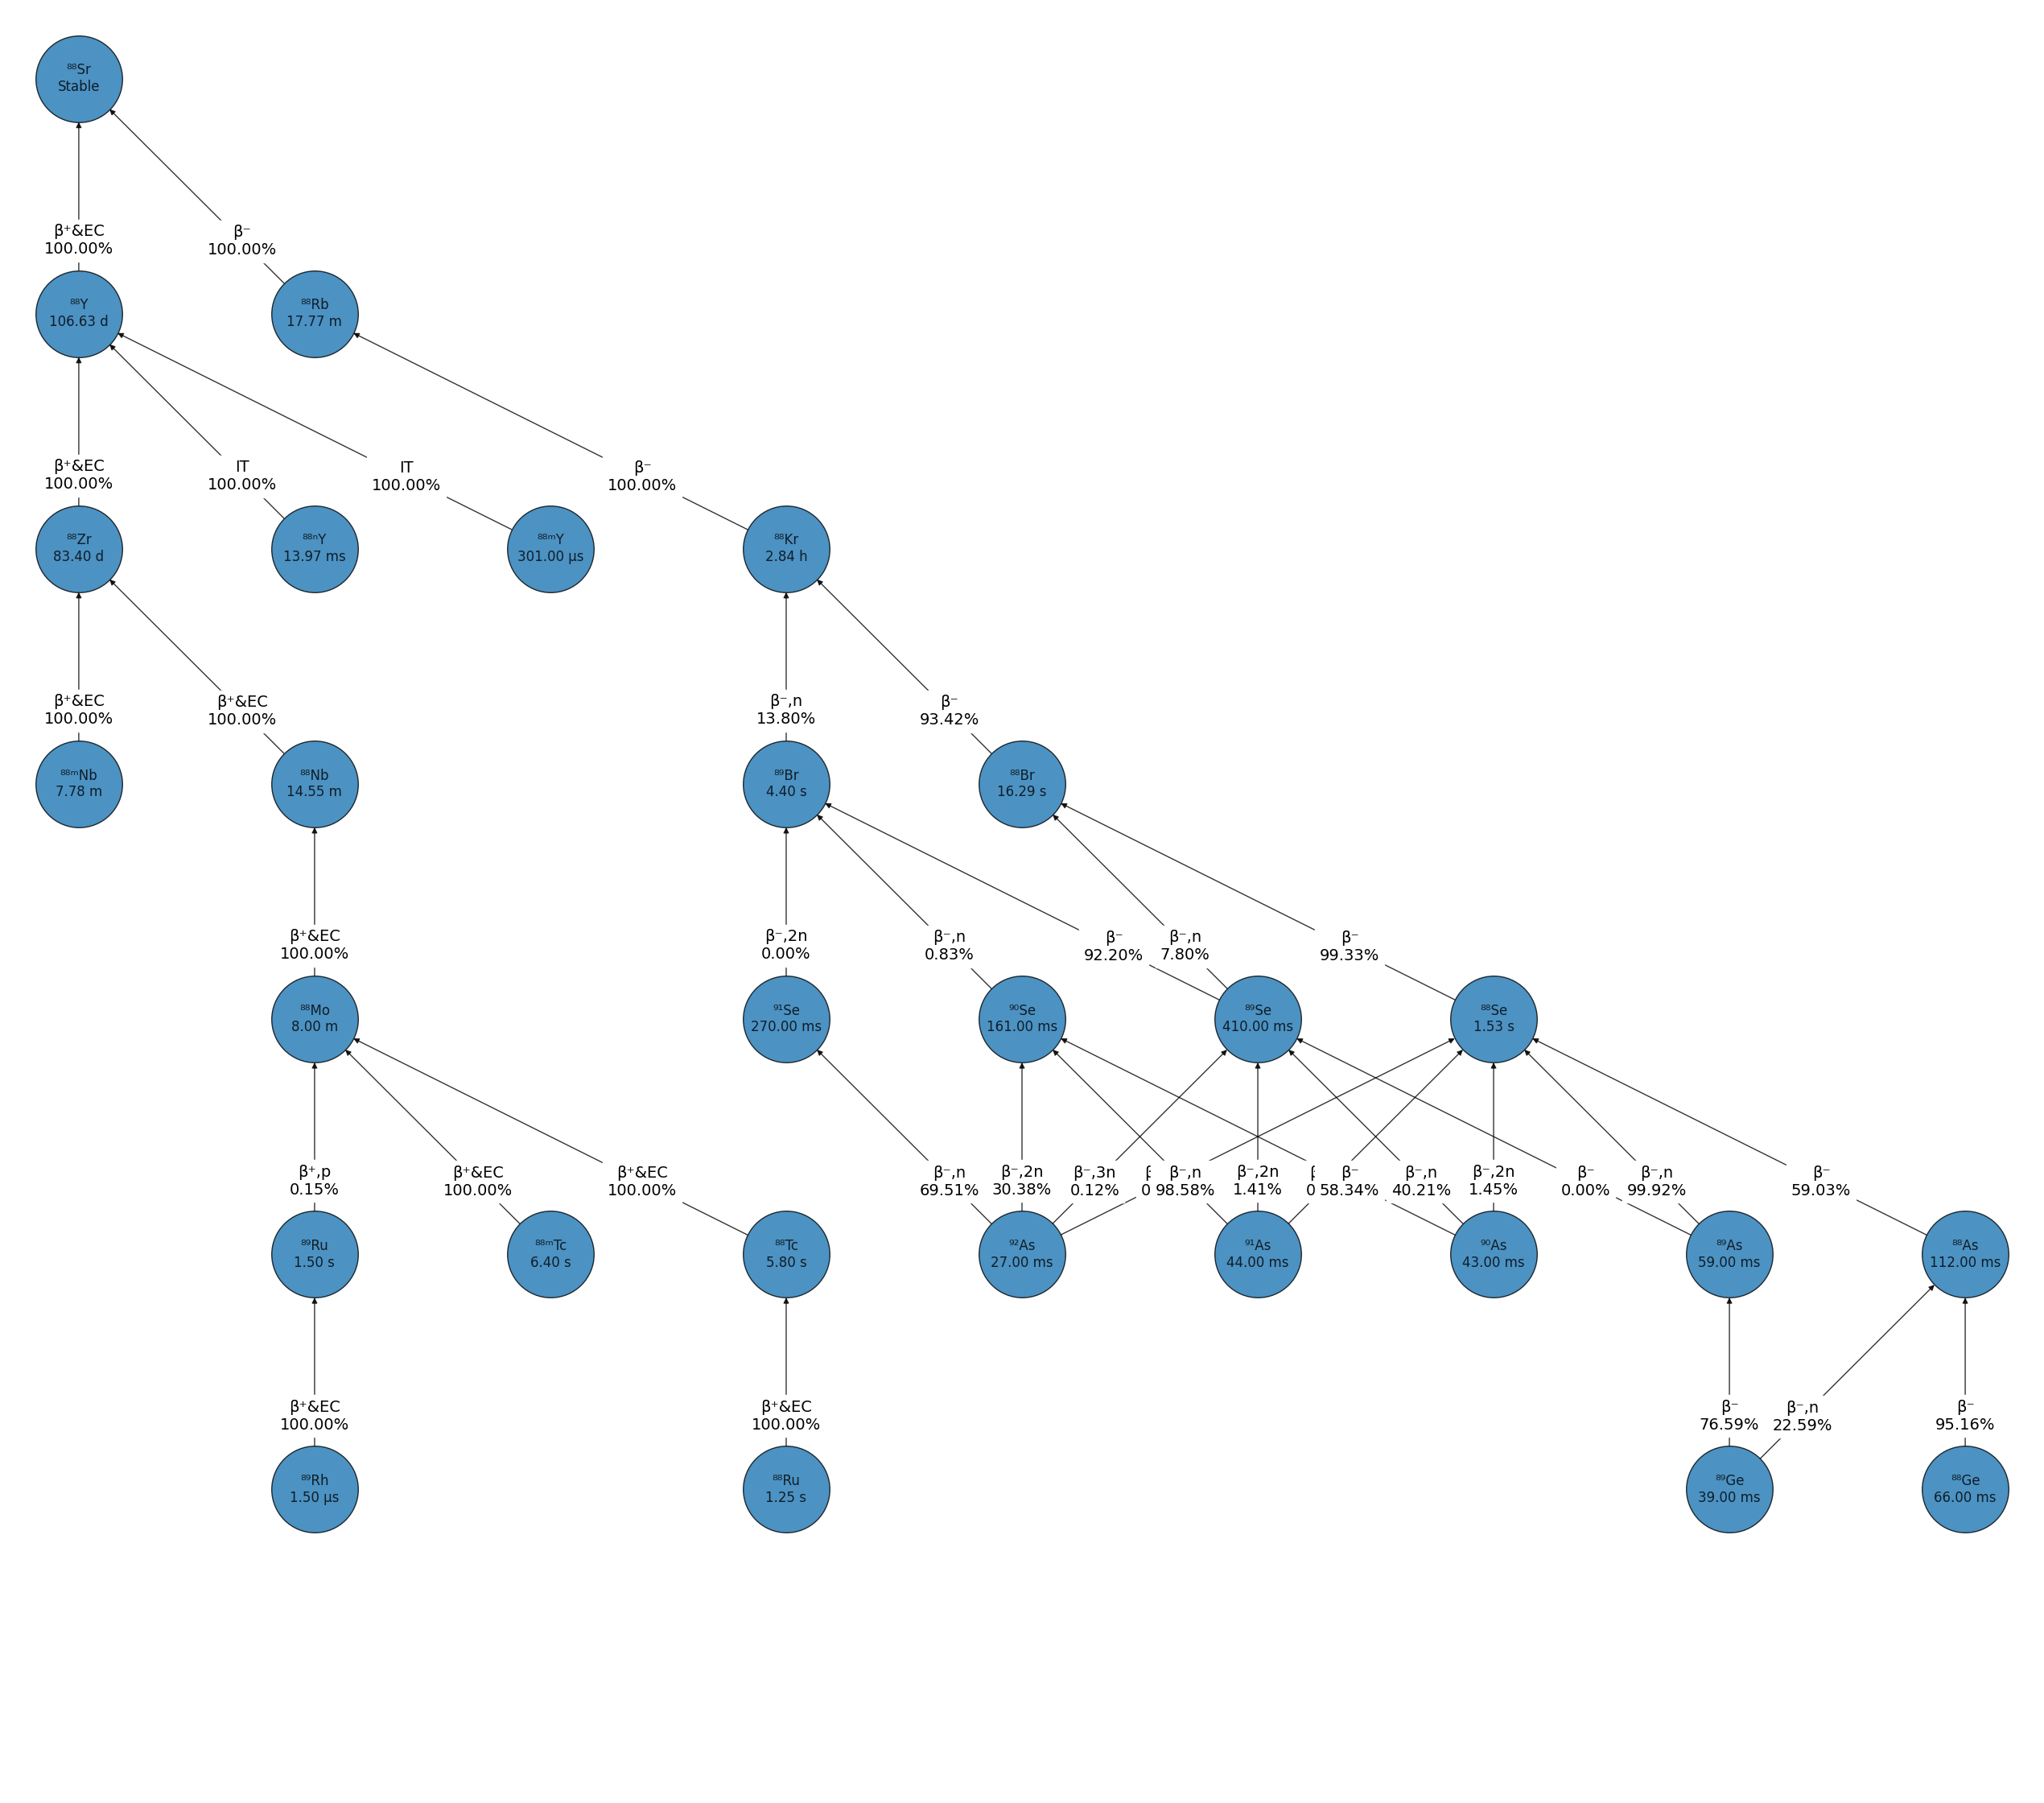

In [2]:
import os
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parent))

from nudca.decay_database import load_decay_database
from nudca.decay_diagram import DecayDiagram


# nuclide = 'Ac-224'
nuclide = 'Sr88'

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
decay_diagram = DecayDiagram(nuclide, decay_database)

radionuclide     = decay_diagram.nuclide
half_life        = decay_diagram.half_life
decay_modes      = decay_diagram.decay_modes
progeny          = decay_diagram.progeny
branching_ratios = decay_diagram.branching_ratios

print('Radionuclide: ', radionuclide )
print('Half life: ', half_life)
print('Progeny: ', progeny)
print('Decay modes:', decay_modes)
print('Branching ratios: ', branching_ratios)


# fig, axes = decay_diagram.plot_decay_chains()
fig, axes = decay_diagram.plot_reverse_decay_chains()

fig.tight_layout()
fig.savefig('Sr88_Reverse.png', dpi=500)

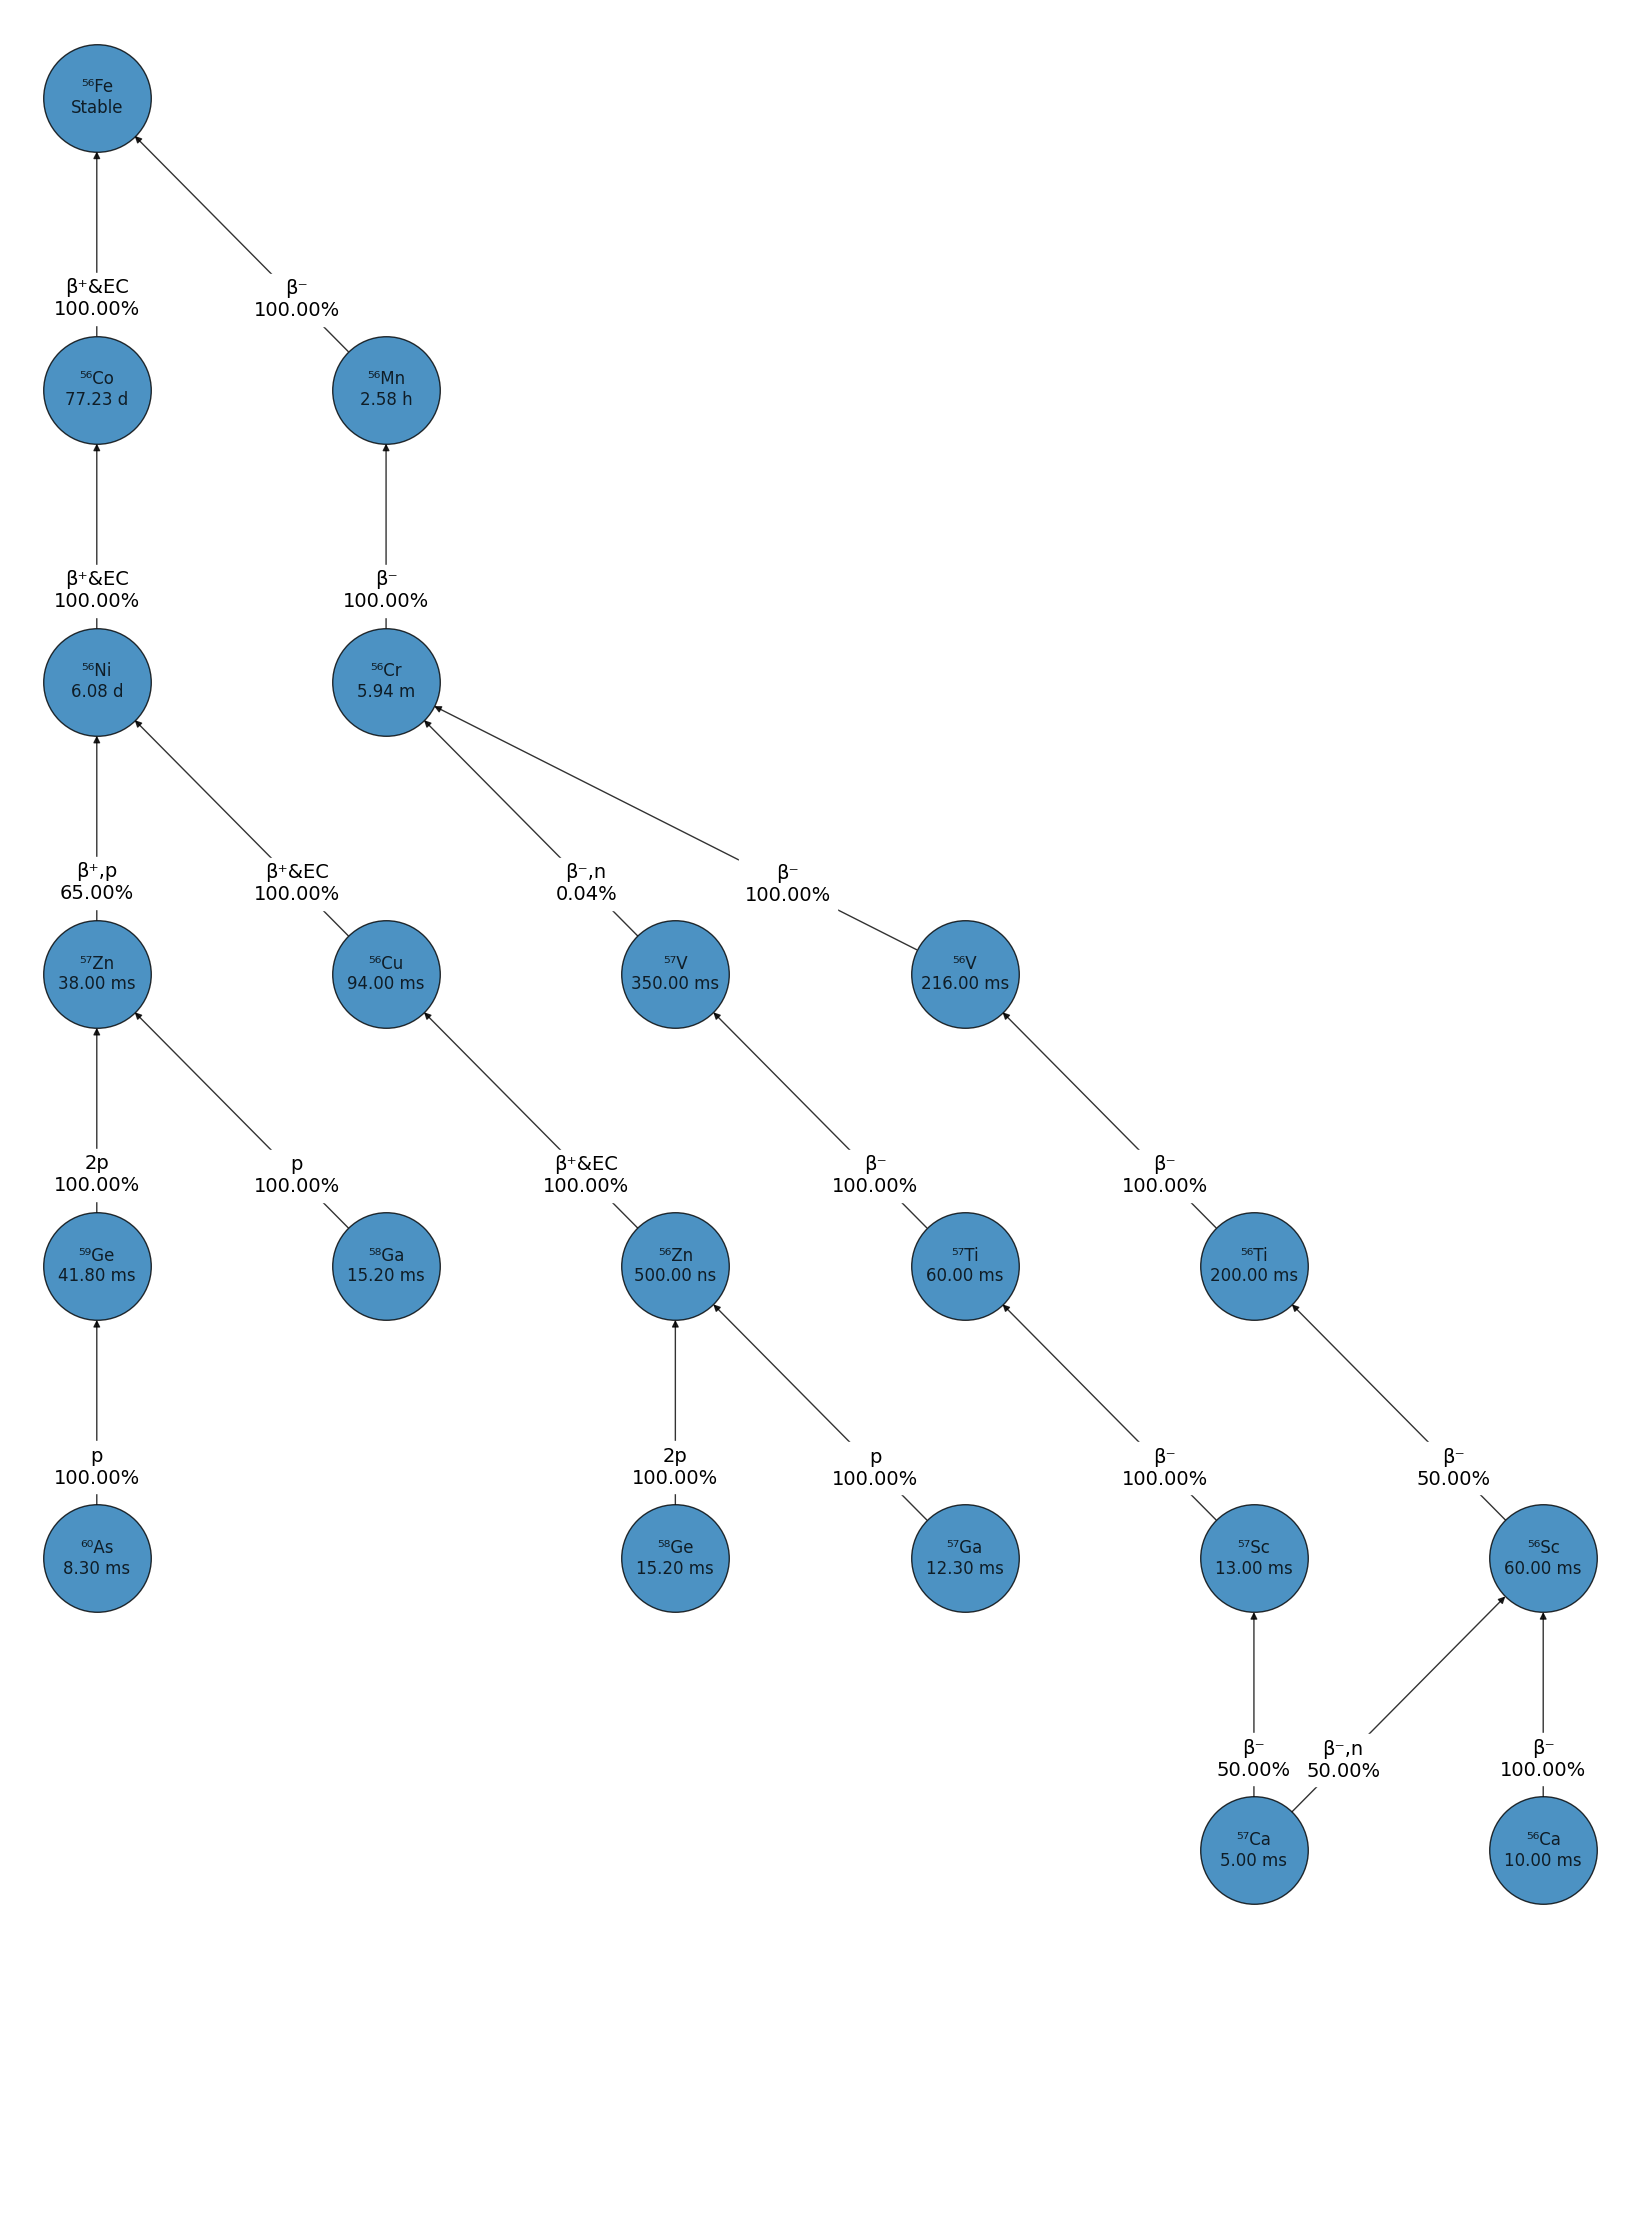

In [2]:

import os
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parent))
import matplotlib.pyplot as plt

from nudca.decay_database import load_decay_database
from nudca.decay_diagram import ReverseDecayDiagram

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')


diagram = ReverseDecayDiagram("Fe-56", decay_database)
fig, ax = diagram.plot()
plt.tight_layout()
plt.show()

In [ ]:
# nuclide = 'U238'
# fig, axes = DecayDiagram(f'{nuclide}', decay_database).plot()
# fig.tight_layout()
# fig.savefig(f'G:/figures/decay_diagram/{nuclide}.png', dpi=1000)

In [4]:
from nudca.decay_database import load_decay_database
from nudca.abundance_calculator import calculate_initial_abundances

# 加载衰变数据库
decay_database = load_decay_database()

# 定义衰变链
decay_chains = [
    ["Ni-56", "Co-56", "Fe-56"],  # 第一条衰变链
    ["Cr-56", "Mn-56", "Fe-56"]   # 第二条衰变链
]

# 假设 Fe-56 的最终丰度为 1.0
final_abundance = 1.e-4

# 计算初始丰度
initial_abundances = calculate_initial_abundances(
    decay_database,
    decay_chains,
    "Fe-56",
    final_abundance
)

# 打印结果
for nuclide, abundance in initial_abundances.items():
    print(f"{nuclide}: {abundance:.4f}")

Ni-56: 0.0001
Cr-56: 0.0001
